# Assignment Set 1

### import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

%matplotlib inline

## problem 1.1: Vibrating String

In [2]:
import src.set_1.vibrating_string
reload(src.set_1.vibrating_string)
from src.set_1.vibrating_string import VibratingString

for sin(5pix)

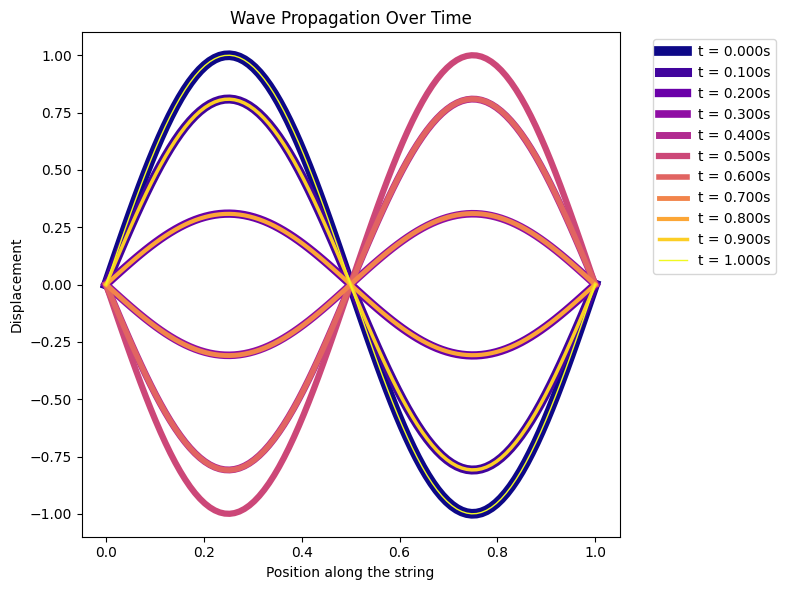

In [3]:
def psi_sin_2pi(x):
    return np.sin(2 * np.pi * x)

string1 = VibratingString(psi_sin_2pi, N=100, simulation_time=1, fig_name="sin_2pi")
string1.run_time_stepping()
string1.plot_static_simulation()
# string1.plot_dynamic_simulation()

for sin(5pix)

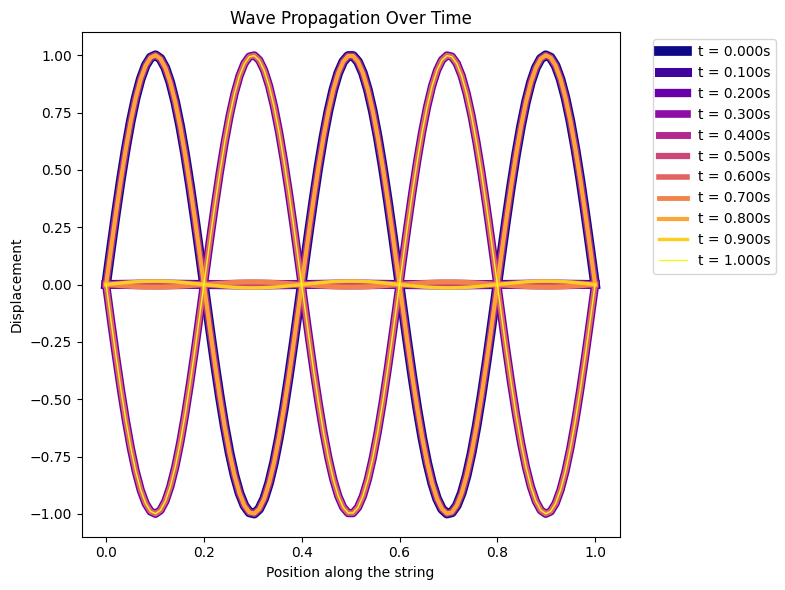

In [4]:
def psi_sin_5pi(x):
    return np.sin(5 * np.pi * x)

string2 = VibratingString(psi_sin_5pi, N=100, simulation_time=1, fig_name="sin_5pi")
string2.run_time_stepping()
string2.plot_static_simulation()
# string2.plot_dynamic_simulation()

for sin(5pix) localized between x = 1/5 and x = 2/5

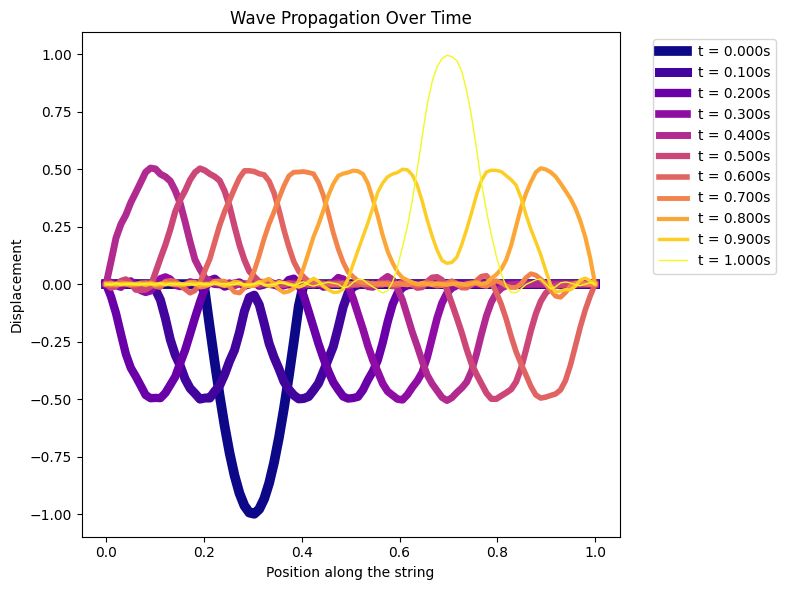

In [5]:
def psi_localized(x):
    return np.where((x > 1/5) & (x < 2/5), np.sin(5 * np.pi * x), 0)

string3 = VibratingString(psi_localized, N=100, simulation_time=1, fig_name="localized")
string3.run_time_stepping()
string3.plot_static_simulation() 
# string3.plot_dynamic_simulation()

Create specific 2x2 graph for report

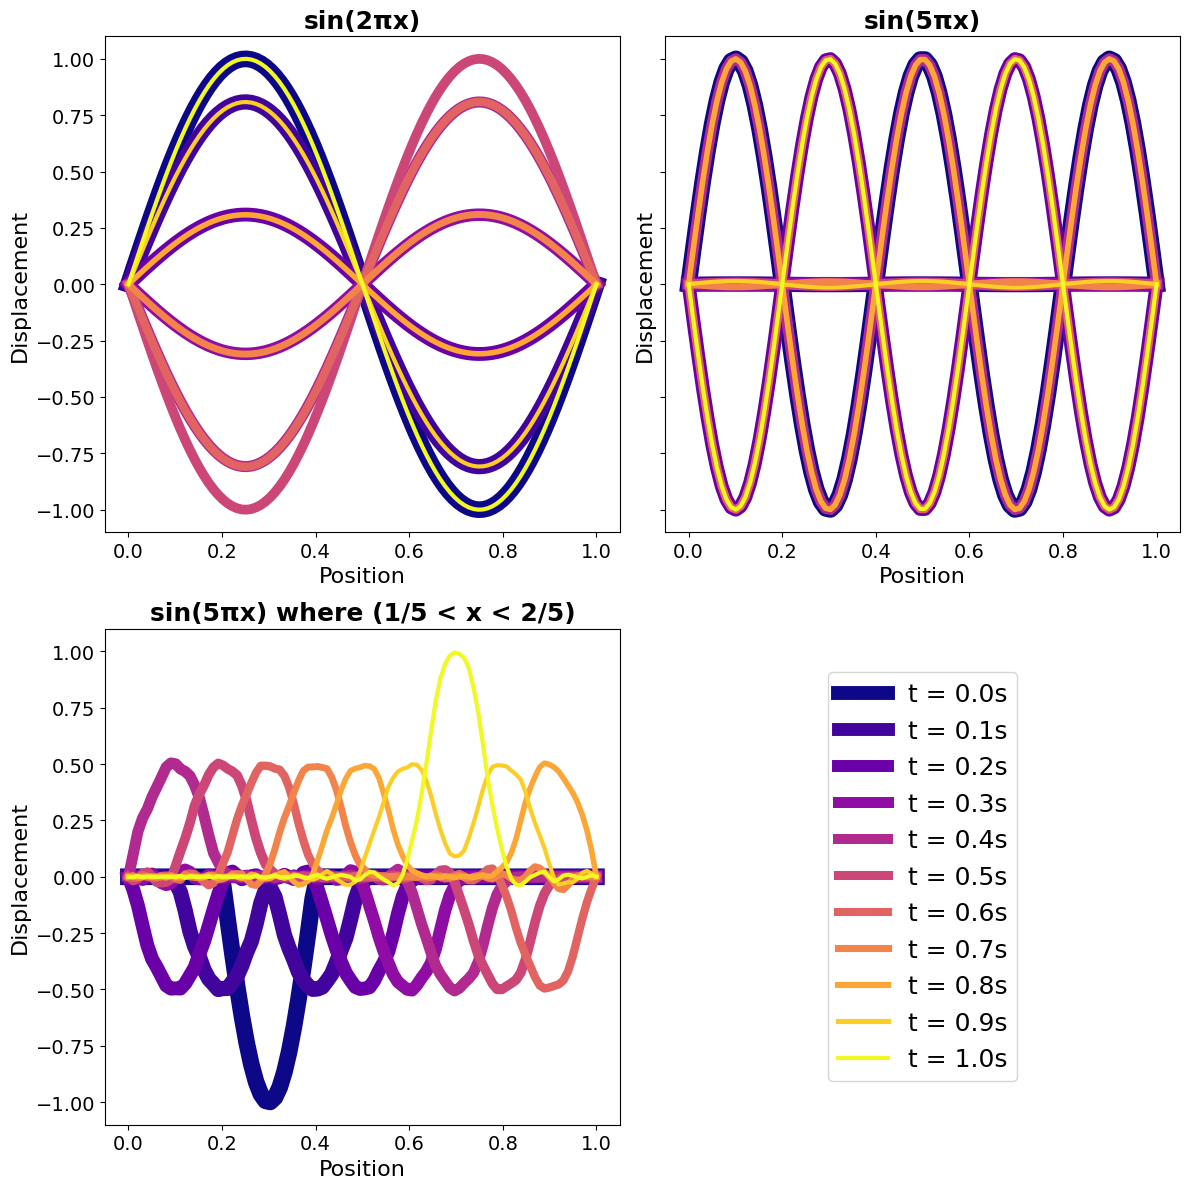

In [7]:
# Create strings and run simulations
strings = [
    ("sin(2πx)", string1),
    ("sin(5πx)", string2),
    ("sin(5πx) where (1/5 < x < 2/5)", string3)
]

for _, string in strings:
    string.run_time_stepping()

# Plot 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True)
colormap = plt.cm.plasma
num_steps = 10

for idx, (title, string) in enumerate(strings):
    ax = axes[idx // 2, idx % 2]
    step_size = int(len(string.u) / num_steps)
    norm = plt.Normalize(vmin=0, vmax=num_steps)

    for i, t in enumerate(range(0, len(string.u), step_size)):
        color = colormap(norm(i))
        line_width = 10 * (1 - i / num_steps) + 2
        ax.plot(string.x, string.u[t, :], color=color, alpha=1, linewidth=line_width)

    color = colormap(norm(num_steps))
    ax.plot(string.x, string.u[-1, :], color=color, alpha=1, linewidth=3)
    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.set_xlabel("Position", fontsize=16)
    ax.set_ylabel("Displacement", fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)

# Plot legend in the fourth subplot
legend_ax = axes[1, 1]
legend_ax.axis('off')
for i in range(num_steps + 1):
    legend_ax.plot([], [], color=colormap(norm(i)), label=f"t = {i / num_steps:.1f}s", linewidth=(7 * (1 - i / num_steps) + 3))

legend_ax.legend(loc='center', fontsize=18)

plt.tight_layout()
plt.savefig("results/set_1/wave/2x2_waves.png")
plt.show()

## Problem 1.2: The Time Dependent Diffusion Equation 

In [1]:
import src.set_1.time_dependent_diffusion
reload(src.set_1.time_dependent_diffusion)
from src.set_1.time_dependent_diffusion import TimeDependentDiffusion

In [2]:
simulation = TimeDependentDiffusion(N=50, simulation_time=1, fig_name="diffusion_simulation") 
simulation.run_time_stepping()

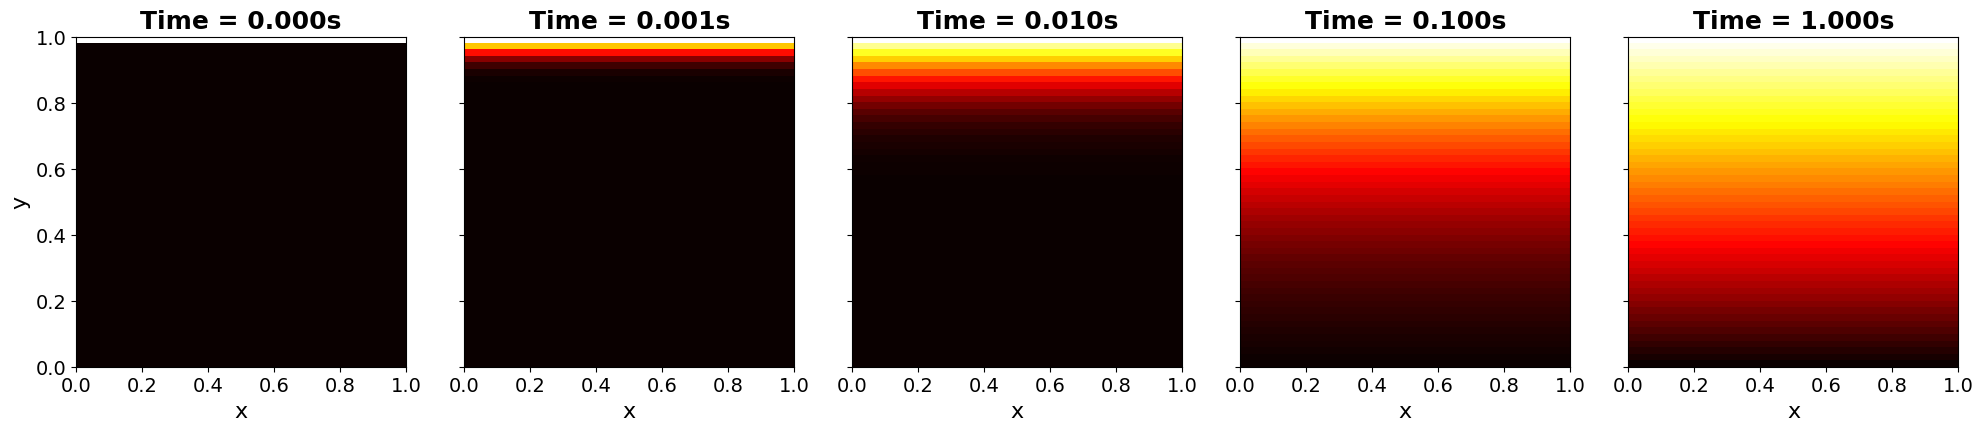

In [3]:
simulation.create_subplot_log_time()

Maximum error at t = 0.001s: 0.02190
Maximum error at t = 0.010s: 0.01099
Maximum error at t = 0.100s: 0.00975
Maximum error at t = 1.000s: 0.00001


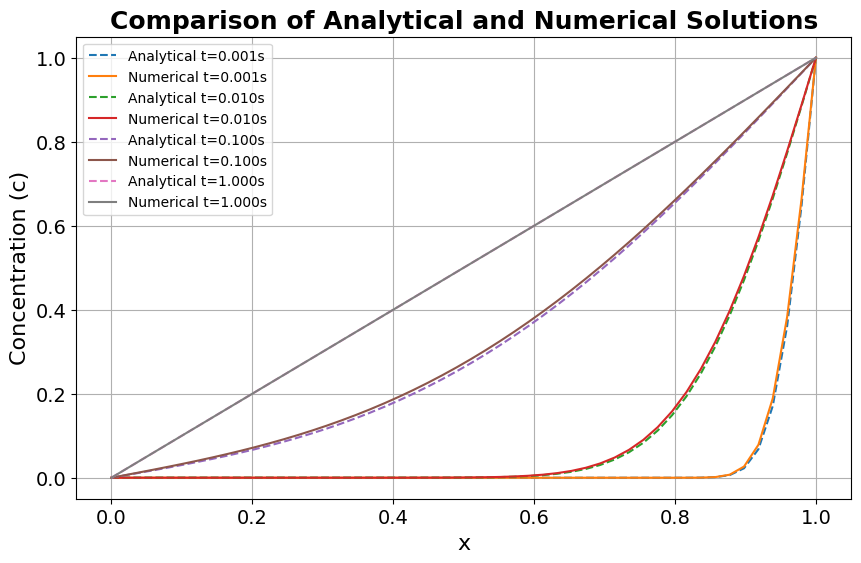

In [4]:
simulation.check_analytical_solution()

In [ ]:
simulation.create_animation()

## H: Jacobi Iteration, Gauss-Seidel and Successive Over-Relaxation

The following code is a simple implementation of the Jacobi Iteration, Gauss-Seidel and Successive Over-Relaxation methods for solving the 2D Laplace equation. It also compares the analytical solution (as given in Equation 5 in the assignment document) with the numerical solution obtained using the three methods.

In [2]:
# Import modules for each numerical method
import src.set_1.jacobi_iteration_optimized
reload(src.set_1.jacobi_iteration_optimized)
from src.set_1.jacobi_iteration_optimized import JacobiIteration

import src.set_1.gauss_seidel_iteration_optimized
reload(src.set_1.gauss_seidel_iteration_optimized)
from src.set_1.gauss_seidel_iteration_optimized import GaussSeidelIteration

import src.set_1.successive_over_relaxation_optimized
reload(src.set_1.successive_over_relaxation_optimized)
from src.set_1.successive_over_relaxation_optimized import SORIteration

In [3]:
solver_ji = JacobiIteration(N=50)
iterations_taken_ji, concentration_ji, diffs_ji = solver_ji.solve()
# solver_ji.plot_solution() # Uncomment to plot the solution

Converged after 7527 iterations


In [4]:
solver_gs = GaussSeidelIteration(N=50)
iterations_taken_gs, concentration_gs, diffs_gs = solver_gs.solve()
# solver_gs.plot_solution() # Uncomment to plot the solution

Converged after 4113 iterations


In [5]:
solver_sor = SORIteration(N=50)
iterations_taken_sor, concentration_sor, diffs_sor = solver_sor.solve(omega=1.92)
# solver_sor.plot_solution() # Uncomment to plot the solution

Converged after 211 iterations


Comparing the numerical solutions with the analytical solution which is given by $c(y, t) = y$

In [9]:
def analytical_solution(N):
    """
    Compute the analytical solution for the diffusion equation.
    """
    y = np.linspace(0, 1, N)
    return y

def compare_analytical_solution(N, c_sor, c_gs, c_ji, separate=False):
    """
    Compare the analytical solution with the numerical solution
    """
    # Get the numerical solution at the center of the domain
    analytical = analytical_solution(N)
    numerical_sor = c_sor[:, N // 2]
    numerical_gs = c_gs[:, N // 2]
    numerical_ji = c_ji[:, N // 2]
    
    if separate:
        plt.figsize=(8, 8)
        plt.plot(analytical, linestyle="--", label="Analytical", linewidth=2.5)
        plt.plot(numerical_sor, linestyle="-", label="SOR", marker="o", alpha=0.6, markersize=5)
        plt.plot(numerical_gs, linestyle="-", label="Gauss-Seidel", marker="^", alpha=0.6, markersize=4)
        plt.plot(numerical_ji, linestyle="-", label="Jacobi", marker="s", alpha=0.6, markersize=3)
        plt.title("Analytical vs. Numerical Solutions", fontsize=18, fontweight="bold")
        plt.xlabel("x", fontsize=16)
        plt.ylabel("Concentration (c)", fontsize=16)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.legend()
        plt.grid()
        plt.savefig("results/set_1/numerical_methods/all_analytical_vs_numerical.png")
        plt.show()
    else:
        # Create a 2x2 subplot
        fig, axes = plt.subplots(2, 2, figsize=(12, 12), sharey=True)
        fig.delaxes(axes[1][1])
        axes = axes.flatten()
        for idx, (ax, c, title) in enumerate(zip(axes, [numerical_ji, numerical_gs, numerical_sor], ["Jacobi", "Gauss-Seidel", "SOR"])):
            ax.plot(analytical, linestyle="--", label="Analytical", linewidth=2.5)
            if title == "SOR":
                ax.plot(c, linestyle="-", label=title, marker="o", alpha=0.5, markersize=5)
            elif title == "Gauss-Seidel":
                ax.plot(c, linestyle="-", label=title, marker="^", alpha=0.5, markersize=5, color="green")
            else:
                ax.plot(c, linestyle="-", label=title, marker="s", alpha=0.5, markersize=5, color="red")
            ax.set_title(title, fontsize=16, fontweight="bold")
            ax.set_xlabel("x", fontsize=14)
            ax.set_ylabel("Concentration (c)", fontsize=14)
            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.legend()
            ax.grid()
        plt.tight_layout()
        plt.savefig("results/set_1/numerical_methods/2x2_analytical_vs_numerical.png")
        plt.show()

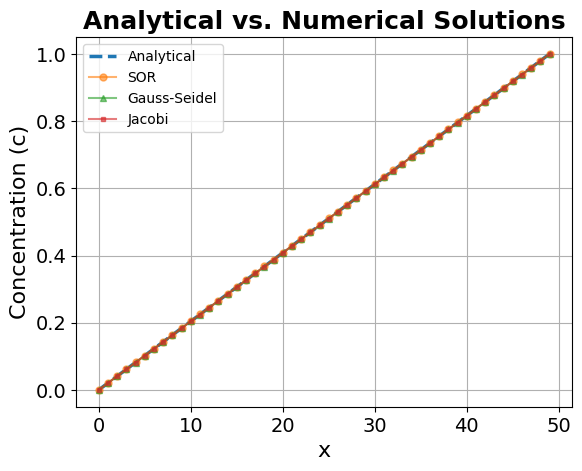

In [10]:
compare_analytical_solution(50, concentration_sor, concentration_gs, concentration_ji, separate=True)

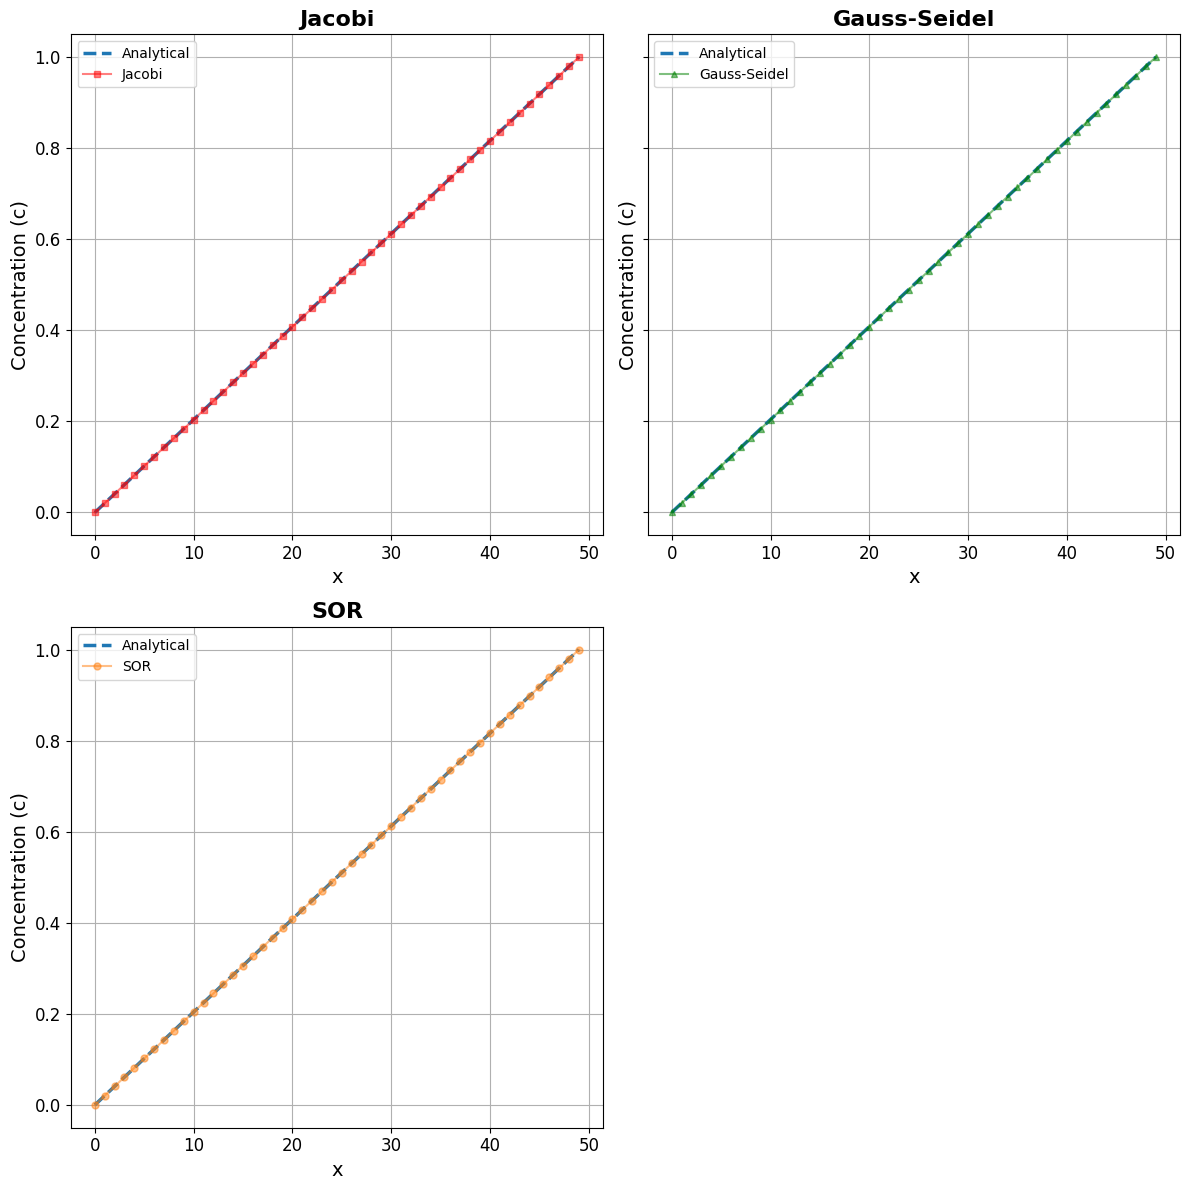

In [11]:
# Plotted separately for better visualization
compare_analytical_solution(50, concentration_sor, concentration_gs, concentration_ji, separate=False)

## I: Convergence Measure vs Number of Iterations

The following code plots the convergence measure against the number of iterations for each of the three solving methods.

In [29]:
# Plot the number of iterations taken for each method on the x-axis and the diffs on the y-axis
def plot_iterations_vs_diffs(iterations, diffs, labels, colors):
    """
    Plot the number of iterations taken for each method on the x-axis and the diffs on the y-axis
    """
    plt.figure(figsize=(12, 8))
    for iteration, diff, label in zip(iterations, diffs, labels):
        # Create a log-lin plot
        if label == "SOR (omega=1)":
            plt.plot(iteration, diff, label=label, linestyle="--", color=colors.pop())
        else:
            plt.plot(iteration, diff, label=label, color=colors.pop())
    plt.yscale('log')
    plt.title(r"Iterations vs. $\delta$", fontsize=18, fontweight="bold")
    plt.xlabel("Iterations", fontsize=16)
    plt.ylabel(r"$\delta$", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=16)
    plt.grid()
    plt.savefig("results/set_1/numerical_methods/iterations_vs_diffs.png")
    plt.show()

In [9]:
# Run SOR for other omega values
omegas = [0.8, 1, 1.6, 1.92]
iterations_sor_all_omegas = []
diffs_sor_all_omegas = []
labels_sor = [f"SOR (omega={omega})" for omega in omegas]

for omega in omegas:
    solver_sor = SORIteration(N=50)
    iterations_taken_sor, concentration_sor, diffs_sor = solver_sor.solve(omega=omega)
    iterations_sor_all_omegas.append(iterations_taken_sor)
    diffs_sor_all_omegas.append(diffs_sor)

Converged after 5869 iterations
Converged after 4113 iterations
Converged after 1202 iterations
Converged after 211 iterations


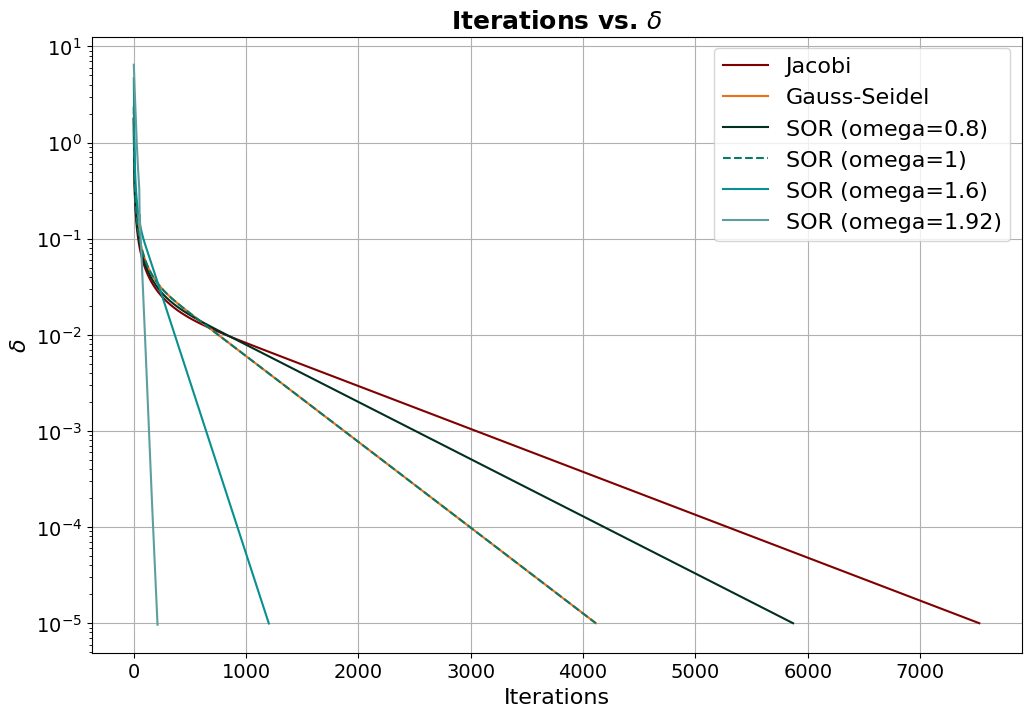

In [40]:
iterations_all_methods = [iterations_taken_ji, iterations_taken_gs]     # Start with the Jacobi and Gauss-Seidel iterations
iterations_all_methods.extend(iterations_sor_all_omegas)                # Extend the list of iterations with the SOR iterations

diffs_all_methods = [diffs_ji, diffs_gs]            # Start with the Jacobi and Gauss-Seidel diffs
diffs_all_methods.extend(diffs_sor_all_omegas)      # Extend the list of diffs with the SOR diffs

labels = ["Jacobi", "Gauss-Seidel"]                 # Start with the Jacobi and Gauss-Seidel labels
labels.extend(labels_sor)                           # Extend the list of labels with the SOR labels

# List of colors for the plot
colors = ["#800000", "#ed7014", "#023020", "#097969", "#088F8F", "#5F9EA0"]

# Plot
plot_iterations_vs_diffs(iterations_all_methods, diffs_all_methods, labels, colors[::-1])

## J: Finding the Optimal $\omega$ for SOR

In [11]:
# Perform a grid search to find minimum omega for SOR given N = 50
omega_values = np.linspace(1.7, 1.99, 100)
iterations_taken_sor = []
N_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
min_omegas = []
for N in N_values:
    for omega in omega_values:
        solver_sor = SORIteration(N=N)
        iter_sor, c_sor, diffs = solver_sor.solve(omega=omega)
        iterations_taken_sor.append(iter_sor[-1])
    min_omega = omega_values[np.argmin(iterations_taken_sor)]
    print(f"Minimum Omega for N = {N}: {min_omega} with {np.min(iterations_taken_sor)} iterations")
    min_omegas.append(min_omega)
    iterations_taken_sor = [] 

Converged after 43 iterations
Converged after 43 iterations
Converged after 43 iterations
Converged after 43 iterations
Converged after 44 iterations
Converged after 44 iterations
Converged after 45 iterations
Converged after 46 iterations
Converged after 46 iterations
Converged after 46 iterations
Converged after 47 iterations
Converged after 48 iterations
Converged after 49 iterations
Converged after 49 iterations
Converged after 49 iterations
Converged after 50 iterations
Converged after 50 iterations
Converged after 51 iterations
Converged after 52 iterations
Converged after 53 iterations
Converged after 53 iterations
Converged after 54 iterations
Converged after 55 iterations
Converged after 57 iterations
Converged after 57 iterations
Converged after 58 iterations
Converged after 59 iterations
Converged after 59 iterations
Converged after 60 iterations
Converged after 61 iterations
Converged after 61 iterations
Converged after 62 iterations
Converged after 64 iterations
Converged 

In [12]:
print(min_omegas)
print(N_values)

[np.float64(1.7), np.float64(1.8054545454545454), np.float64(1.86989898989899), np.float64(1.902121212121212), np.float64(1.9196969696969697), np.float64(1.9343434343434343), np.float64(1.943131313131313), np.float64(1.948989898989899), np.float64(1.9548484848484848), np.float64(1.9607070707070706)]
[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [17]:
# Write a function to plot the minimum omega values for different N values
def plot_min_omegas(N_values, min_omegas):
    """
    Plot the minimum omega values for different N values
    """
    plt.figure(figsize=(12, 8))
    plt.plot(N_values, min_omegas, marker="o")
    plt.title("Minimum Omega Values for Different N Values", fontsize=18, fontweight="bold", color="#023020")
    plt.xlabel("N", fontsize=16)
    plt.ylabel("Omega", fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.grid()
    plt.savefig("results/set_1/numerical_methods/min_omegas_vs_N.png")
    plt.show()

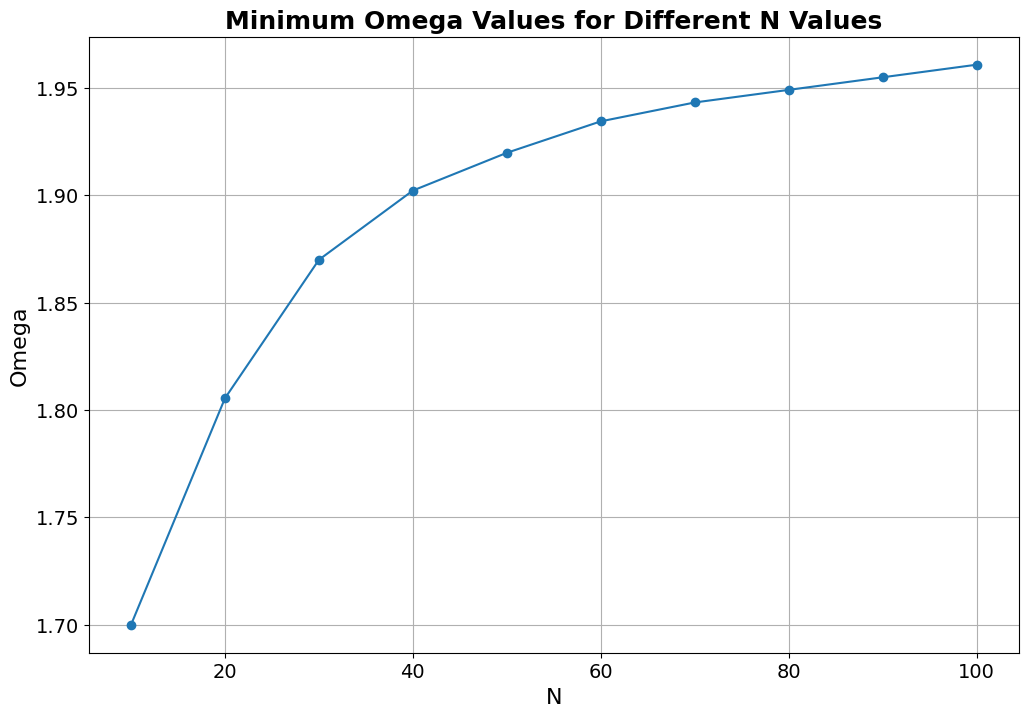

In [18]:
# Plot
plot_min_omegas(N_values, min_omegas)

## K: Implementing Sinks

In [52]:
from importlib import reload
import src.set_1.jacobi_with_sinks
reload(src.set_1.jacobi_with_sinks)
from src.set_1.jacobi_with_sinks import JacobiIteration

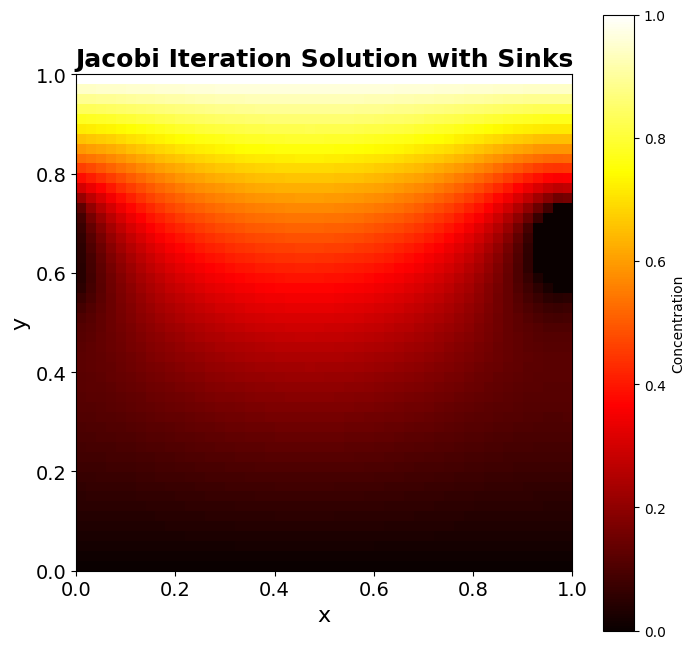

In [53]:
solver_ji_sinks = JacobiIteration(N=50)
iterations_taken_ji_sinks, concentration_ji_sinks, diffs_ji_sinks = solver_ji_sinks.solve()
solver_ji_sinks.plot_solution() # Uncomment to plot the solution